# **1. Interesting Topic Selection with 9+ categories**

**Topic: Traditional Clothing Recognition**

1. KIMONO (JAPAN)
2. HANBOK (SOUTH KOREA)
3. CHEONGSAM/QIPAO (CHINA)
4. SARI (INDIA)
5. THAWB/DISHDASHA (SAUDI ARABIA)
6. DIRNDL (GERMANY)
7. KILT (SCOTLAND)
8. AO DAI (VIETNAM)
9. BOUBOU (WEST AFRICA)
10. HUIPIL (MEXICO)
11. SARONG (INDONESIA)
12. CHADOR (IRAN)
13. TRAJE DE FLAMENCA (SPAIN)
14. BATIK (MALAYSIA)
15. THOBE (PALESTINE)
16. NATIONAL DRESS (NORWAY)
17. NATIONAL COSTUME (PHILIPPINES)
18. BARONG TAGALOG (PHILIPPINES)
19. ABAYA (UNITED ARAB EMIRATES)
20. FOLKDRÄKT (SWEDEN)
21. AO PO'I (PARAGUAY)
22. POUNAMU PIUPIU (NEW ZEALAND)
23. KAFTAN (MOROCCO)



Setting Up Neccessary things

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8 # Batch Size

In [2]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.4/492.4 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

**Mount Google Drive**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/Master_Course_Data Science/LastAssignment

/content/drive/MyDrive/Master_Course_Data Science/LastAssignment


# **2. Data Collection, Model Training, Data Cleaning**

## **Data Collection**



**Download Images From Browser**

In [6]:
doc(search_images_ddg)

In [7]:
categories = [
    "KIMONO (JAPAN)",
    "HANBOK (SOUTH KOREA)",
    "CHEONGSAM/QIPAO (CHINA)",
    "SARI (INDIA)",
    "THAWB/DISHDASHA (SAUDI ARABIA)",
    "DIRNDL (GERMANY)",
    "KILT (SCOTLAND)",
    "AO DAI (VIETNAM)",
    "BOUBOU (WEST AFRICA)",
    "HUIPIL (MEXICO)",
    "SARONG (INDONESIA)",
    "CHADOR (IRAN)",
    "TRAJE DE FLAMENCA (SPAIN)",
    "BATIK (MALAYSIA)",
    "THOBE (PALESTINE)",
    "NATIONAL DRESS (NORWAY)",
    "NATIONAL COSTUME (PHILIPPINES)",
    "BARONG TAGALOG (PHILIPPINES)",
    "ABAYA (UNITED ARAB EMIRATES)",
    "FOLKDRÄKT (SWEDEN)",
    "AO PO'I (PARAGUAY)",
    "POUNAMU PIUPIU (NEW ZEALAND)",
    "KAFTAN (MOROCCO)"
]

len(categories)

23

In [8]:
images = search_images_ddg(categories[0])
f"Number of Images => {len(images)} -- One Image URL => {images[0]}"

'Number of Images => 200 -- One Image URL => https://www.sfjapantown.org/wp-content/uploads/2019/10/Mark_KimonoDay-scaled.jpg'

In [9]:
doc(download_url)

In [10]:
dest = "kimono (Japan).jpg"
download_url(images[0], dest, show_progress= False)

Path('kimono (Japan).jpg')

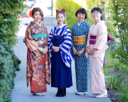

In [11]:
image = Image.open(dest)
image.to_thumb(128, 128)

**Combine All of them**

In [12]:
import os
import re

data_path = "data"
if not os.path.exists(data_path):
    os.mkdir(data_path)

for clothing_type in categories:
    # Replace invalid characters with underscores
    directory_name = re.sub(r'[^\w\s-]', '_', clothing_type)
    dest = f"{data_path}/{directory_name}"
    if not os.path.exists(dest):
        os.mkdir(dest)

        try:
            cloth_image_urls = search_images_ddg(clothing_type)
            download_images(dest, urls=cloth_image_urls)
        except:
            continue


In [13]:
images_counts = get_image_files(data_path)
images_counts

(#3650) [Path('data/KIMONO _JAPAN_/608c6df2-e488-4c90-90f3-824badbdb761.jpg'),Path('data/KIMONO _JAPAN_/5a281d18-64bc-4ff6-aeed-59d3e57fdb98.jpg'),Path('data/KIMONO _JAPAN_/6e5e3ea5-f32a-4356-bd76-6f016c47cf63.jpg'),Path('data/KIMONO _JAPAN_/0e476327-a4a2-4dbd-8ee5-9a11eaaf8418.jpg'),Path('data/KIMONO _JAPAN_/70152e5e-cd66-4715-a756-948d397f3f5b.jpg'),Path('data/KIMONO _JAPAN_/14264736-9229-4a55-bcd9-101ad2962457.jpg'),Path('data/KIMONO _JAPAN_/4d07af85-af01-49fd-849c-3feb5f09a887.jpg'),Path('data/KIMONO _JAPAN_/79967b4b-143f-4bf6-abbb-995d75d36c79.jpg'),Path('data/KIMONO _JAPAN_/ea942398-7132-4664-ab4b-3b74709cb213.jpg'),Path('data/KIMONO _JAPAN_/94f47496-7ad3-475f-a19d-7849f2ab0a1b.jpg')...]

In [14]:
image_count = len(images_counts)
print(f"Total image count: {image_count}")

Total image count: 3650


In [16]:
import os
from PIL import Image

data_path = "data"

# Iterate over the category folders
for category in os.listdir(data_path):
    category_path = os.path.join(data_path, category)

    # Iterate over the images in the category folder
    for image_file in os.listdir(category_path):
        image_path = os.path.join(category_path, image_file)

        # Attempt to open the image file using PIL
        try:
            image = Image.open(image_path)

            # Perform any necessary processing on the image here

        except OSError as e:
            print(f"Error opening image: {image_path} - {str(e)}")

            # Delete the problematic image file
            os.remove(image_path)
            print(f"Deleted image: {image_path}")


Error opening image: data/KIMONO _JAPAN_/2d64687e-ab12-414d-a666-685438d09b24.jpg - cannot identify image file 'data/KIMONO _JAPAN_/2d64687e-ab12-414d-a666-685438d09b24.jpg'
Deleted image: data/KIMONO _JAPAN_/2d64687e-ab12-414d-a666-685438d09b24.jpg
Error opening image: data/KIMONO _JAPAN_/99880381-6d11-44de-ac5b-4db229baf4dc.jpg - cannot identify image file 'data/KIMONO _JAPAN_/99880381-6d11-44de-ac5b-4db229baf4dc.jpg'
Deleted image: data/KIMONO _JAPAN_/99880381-6d11-44de-ac5b-4db229baf4dc.jpg
Error opening image: data/KIMONO _JAPAN_/dc89d799-22f8-4f19-adf6-82b056470807.jpg - cannot identify image file 'data/KIMONO _JAPAN_/dc89d799-22f8-4f19-adf6-82b056470807.jpg'
Deleted image: data/KIMONO _JAPAN_/dc89d799-22f8-4f19-adf6-82b056470807.jpg
Error opening image: data/HANBOK _SOUTH KOREA_/f9e2c5d7-6c79-41b9-b152-3fb22e26e64f.jpg - cannot identify image file 'data/HANBOK _SOUTH KOREA_/f9e2c5d7-6c79-41b9-b152-3fb22e26e64f.jpg'
Deleted image: data/HANBOK _SOUTH KOREA_/f9e2c5d7-6c79-41b9-b152

In [17]:
image_count = len(images_counts)
print(f"Total image count: {image_count}")

Total image count: 3650


In [18]:
# failed = verify_images(data_path)
# Verify the images in the data directory
failed_images = verify_images(os.listdir(data_path))
failed_images

(#23) ['KIMONO _JAPAN_','HANBOK _SOUTH KOREA_','CHEONGSAM_QIPAO _CHINA_','SARI _INDIA_','THAWB_DISHDASHA _SAUDI ARABIA_','DIRNDL _GERMANY_','KILT _SCOTLAND_','AO DAI _VIETNAM_','BOUBOU _WEST AFRICA_','HUIPIL _MEXICO_'...]

In [19]:
from fastai.vision.utils import verify_images
import os

data_path = "data"

# Create a list to store the image file paths
image_files = []

# Iterate over the category directories
for category in os.listdir(data_path):
    category_path = os.path.join(data_path, category)

    # Iterate over the image files in the category directory
    for file in os.listdir(category_path):
        # Construct the full path of the image file
        file_path = os.path.join(category_path, file)

        # Append the image file path to the list
        image_files.append(file_path)

# Verify the images
failed_images = verify_images(image_files)

print(failed_images)


['data/AO DAI _VIETNAM_/fc6d72df-895c-40d3-a128-076434d938ce.jpg', 'data/BATIK _MALAYSIA_/1506eb46-1a54-47d8-9f33-a779248a0714.jpg']


In [20]:
failed_images

(#2) ['data/AO DAI _VIETNAM_/fc6d72df-895c-40d3-a128-076434d938ce.jpg','data/BATIK _MALAYSIA_/1506eb46-1a54-47d8-9f33-a779248a0714.jpg']

In [21]:
from pathlib import Path
# Iterate over the failed images and delete them
for image_path in failed_images:
    # Create a Path object for the image file
    image_file = Path(image_path)

    # Check if the image file exists and delete it
    if image_file.is_file():
        image_file.unlink()
    else:
        print(f"Image file does not exist: {image_path}")

In [22]:
images_counts

(#3650) [Path('data/KIMONO _JAPAN_/608c6df2-e488-4c90-90f3-824badbdb761.jpg'),Path('data/KIMONO _JAPAN_/5a281d18-64bc-4ff6-aeed-59d3e57fdb98.jpg'),Path('data/KIMONO _JAPAN_/6e5e3ea5-f32a-4356-bd76-6f016c47cf63.jpg'),Path('data/KIMONO _JAPAN_/0e476327-a4a2-4dbd-8ee5-9a11eaaf8418.jpg'),Path('data/KIMONO _JAPAN_/70152e5e-cd66-4715-a756-948d397f3f5b.jpg'),Path('data/KIMONO _JAPAN_/14264736-9229-4a55-bcd9-101ad2962457.jpg'),Path('data/KIMONO _JAPAN_/4d07af85-af01-49fd-849c-3feb5f09a887.jpg'),Path('data/KIMONO _JAPAN_/79967b4b-143f-4bf6-abbb-995d75d36c79.jpg'),Path('data/KIMONO _JAPAN_/ea942398-7132-4664-ab4b-3b74709cb213.jpg'),Path('data/KIMONO _JAPAN_/94f47496-7ad3-475f-a19d-7849f2ab0a1b.jpg')...]

### **From Data to Data Loader**

In [23]:
dblock = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,                                # get_image_file returns a list of all images in that path recursively by default
    splitter = RandomSplitter(valid_pct= 0.1, seed = 42),       # getting 80-20 train-validation split
    get_y = parent_label,                                       # taking the folder name as labels
    item_tfms= Resize(128)                                      # resizing to get the image of same shape
)

In [24]:
dls = dblock.dataloaders(data_path, bs = bs)                    # Setting up batch size for efficient GPU use

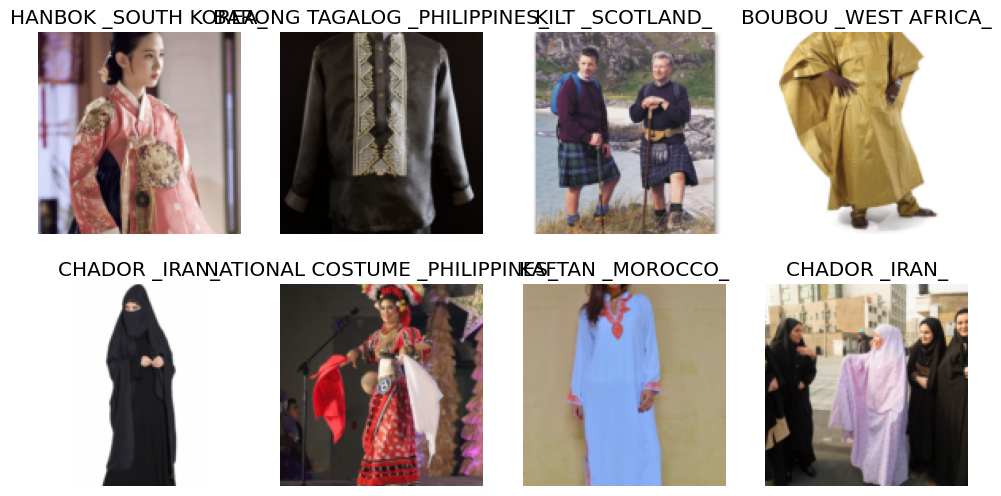

In [26]:
dls.train.show_batch(max_n = 8, nrows = 2)

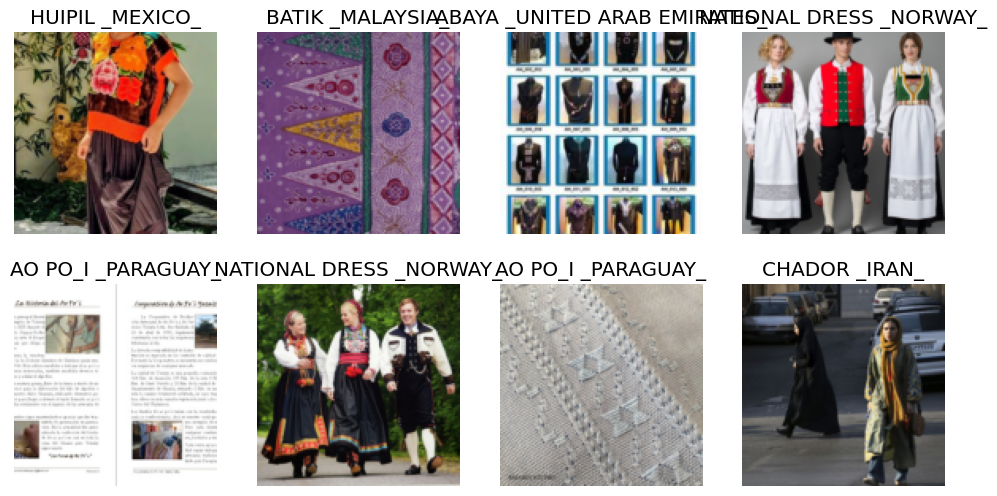

In [27]:
from PIL import UnidentifiedImageError

try:
    dls.valid.show_batch(max_n = 8, nrows = 2)
except UnidentifiedImageError as e:
    print(f"Error occurred while displaying batch: {str(e)}")

**Data Augmentation**

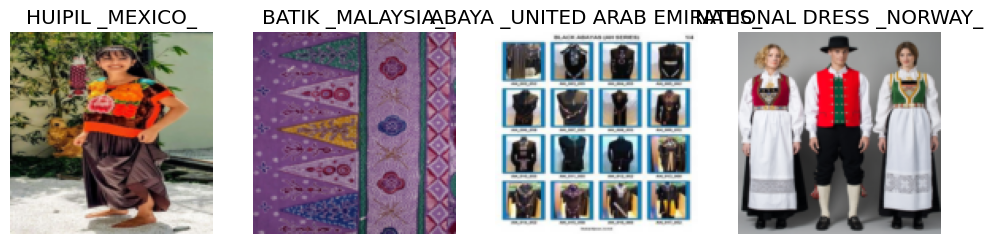

In [28]:
dblock = dblock.new(item_tfms= Resize(128, ResizeMethod.Squish))      # Squishing the whole image into (128 X 128)size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n= 4, nrows = 1)

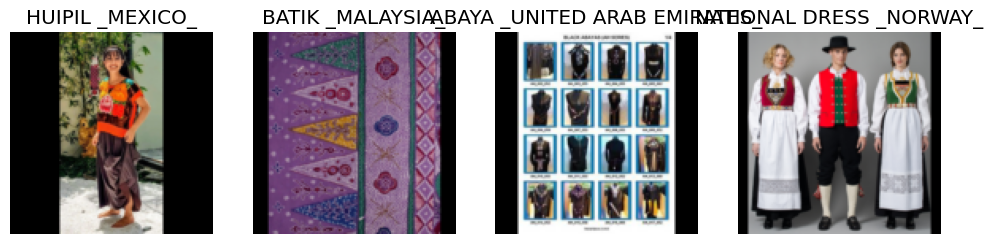

In [29]:
dblock = dblock.new(item_tfms= Resize(128, ResizeMethod.Pad, pad_mode = "zeros"))      # Padding the extra space the whole image into (128 X 128)size without Squishing
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n= 4, nrows = 1)

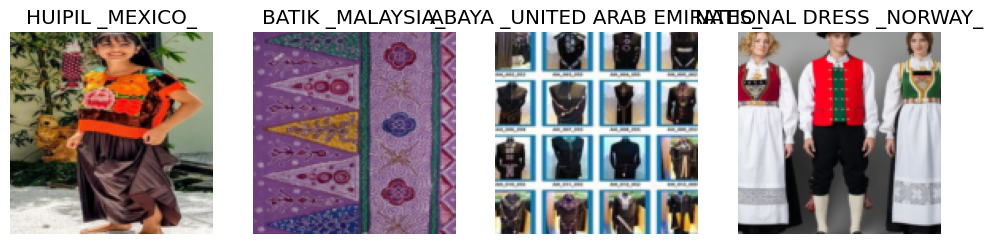

In [30]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale= 0.3))      # Randomly cropping, cutting, resizing, coloring parts of image into (128 X 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n = 4, nrows = 1)

In [31]:
doc(aug_transforms)

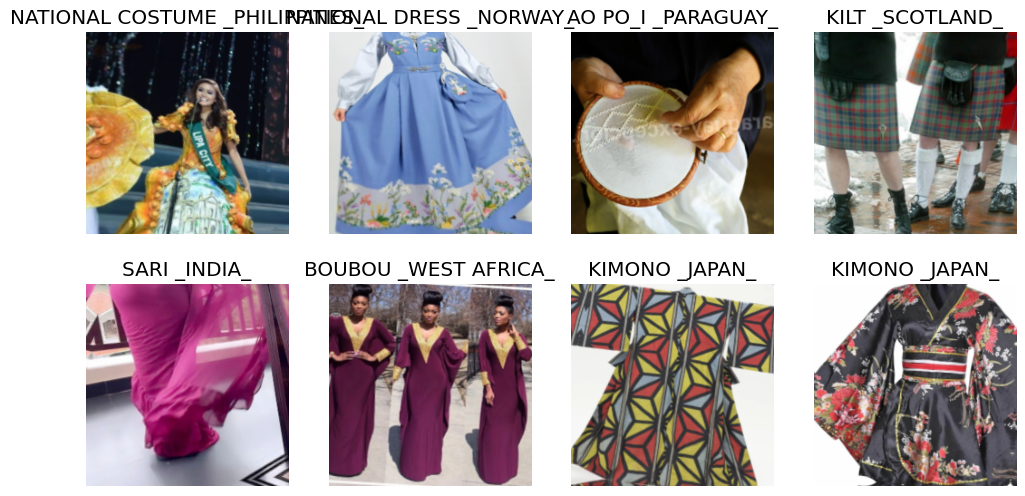

In [32]:
# RandomResizedCrop crops images randomly and create copies so that we don't miss out anything
#aug_transforms is used for image data augmentation
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale= 0.5), batch_tfms= aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n = 8, nrows = 2)

In [33]:
torch.save(dls, "data_loader/cloth_dataloader_v0.pkl")